In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "cats-vs-dogs-cnn-64x2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

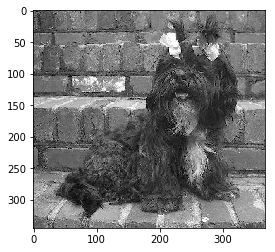

In [4]:
DATADIR = "PetImages"
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [6]:
print(img_array.shape)

(345, 367)


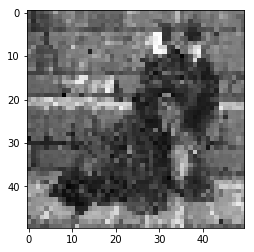

In [14]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()
                       

In [18]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) # 0 Dog, 1 Cat
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [19]:
print(len(training_data))

24946


In [20]:
import random
random.shuffle(training_data)

In [21]:
x = []
y = []

In [24]:
for features, label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [28]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

x = x/255 #normalization

In [42]:

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
   
model.add(Dense(64))          
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])
model.fit(x,y,batch_size = 32, epochs = 10, validation_split = 0.3, callbacks = [tensorboard])

Train on 34924 samples, validate on 14968 samples
Epoch 1/10
34924/34924 [==============================] - 256s 7ms/sample - loss: 0.6915 - acc: 0.5107 - val_loss: 0.6848 - val_acc: 0.5267
Epoch 2/10
34924/34924 [==============================] - 262s 8ms/sample - loss: 0.6763 - acc: 0.5407 - val_loss: 0.6658 - val_acc: 0.5480
Epoch 3/10
34924/34924 [==============================] - 264s 8ms/sample - loss: 0.6396 - acc: 0.5709 - val_loss: 0.6201 - val_acc: 0.5864
Epoch 4/10
34924/34924 [==============================] - 313s 9ms/sample - loss: 0.5934 - acc: 0.6038 - val_loss: 0.5758 - val_acc: 0.6135
Epoch 5/10
34924/34924 [==============================] - 289s 8ms/sample - loss: 0.5548 - acc: 0.6240 - val_loss: 0.5446 - val_acc: 0.6293
Epoch 6/10
34924/34924 [==============================] - 319s 9ms/sample - loss: 0.5325 - acc: 0.6329 - val_loss: 0.5258 - val_acc: 0.6389
Epoch 7/10
34924/34924 [==============================] - 275s 8ms/sample - loss: 0.5186 - acc: 0.6427 - val_l

In [43]:
model.save('64x2-CNN.model')